In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

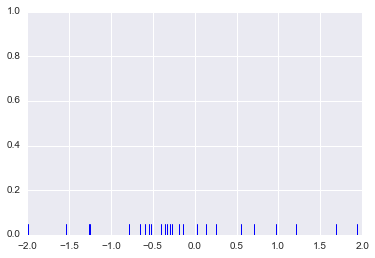

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

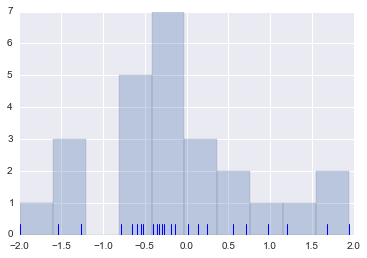

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

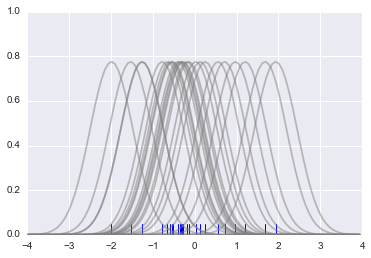

In [21]:
sns.rugplot(dataset)
x_min=dataset.min() - 2
x_max=dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset))) ** 0.2

kernel_list =[]

for data_point in dataset:
    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    #kernel = kernel / kernel.max()
    #kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color = 'grey',alpha = 0.5)
    plt.ylim(0,1)

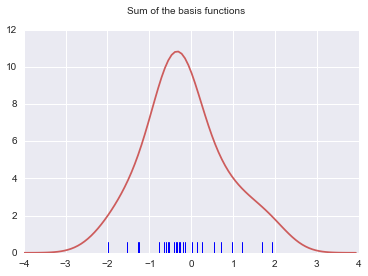

In [20]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
#plt.yticks([])
plt.suptitle("Sum of the basis functions")

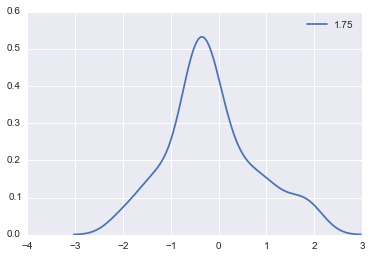

In [24]:
sns.kdeplot(dataset)

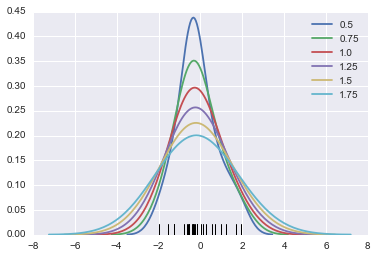

In [23]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [25]:
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

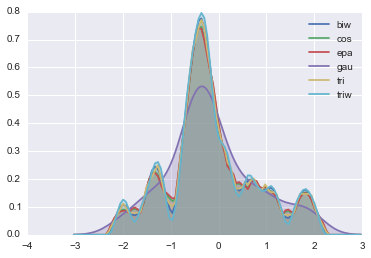

In [28]:
kernel_options=['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

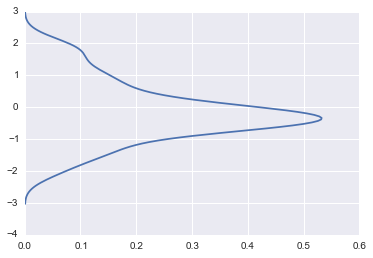

In [30]:
sns.kdeplot(dataset,vertical=True)

In [32]:
url='https://en.wikipedia.org/wiki/Cumulative_distribution_function'

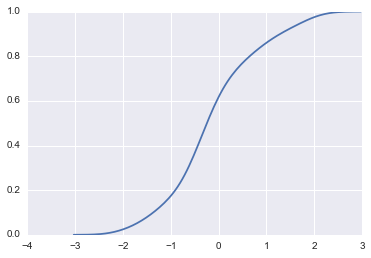

In [33]:
sns.kdeplot(dataset,cumulative=True)

In [34]:
mean=[0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

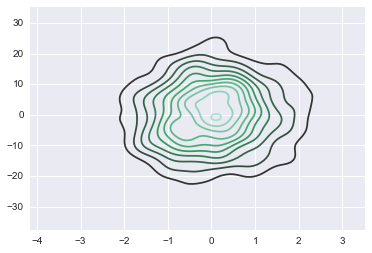

In [36]:
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

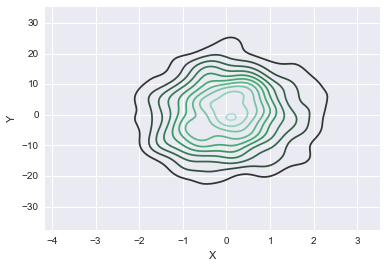

In [38]:
sns.kdeplot(dframe.X,dframe.Y)

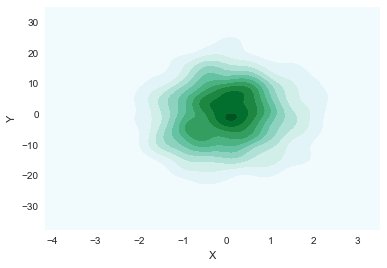

In [39]:
sns.kdeplot(dframe.X,dframe.Y,shade='True')

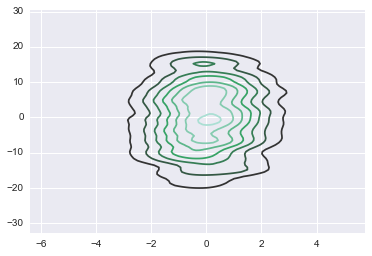

In [40]:
sns.kdeplot(dframe,bw=1)

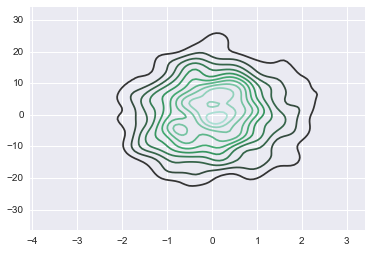

In [41]:
sns.kdeplot(dframe,bw='silverman')

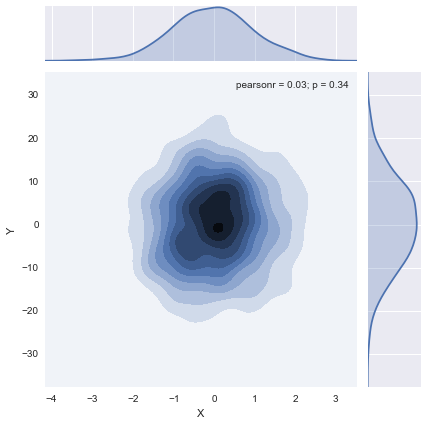

In [42]:
sns.jointplot('X','Y',dframe,kind='kde')